In [248]:
#file utils.py

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse.csgraph import minimum_spanning_tree


def plot_clusters(X, Y, fignum='data', show=False):
    """
    Function to plot clusters.

    :param X: (num_samples, 2) matrix of 2-dimensional samples
    :param Y:  (num_samples, ) vector of cluster assignment
    :param fignum: figure name
    :param show: If True, call plt.show()
    :return:
    """
    K = Y.max() + 1
    plt.figure(fignum)
    for k in range(K):
        plt.plot(X[Y == k, 0], X[Y == k, 1], 'o')  #on plot tout les échantillons Xi qui sont dans le cluster k
    if show:
        plt.show()


def min_span_tree(W): 
#va renvoyer une matrice de true ou de false, quand c'est true ca veut dire que c'est le chemin le plus court 
# (ie le plus légé) qui va du noeud i au noeud j, il faut que le graph soit undirected
    """
    :param W: (n x n) adjacency matrix representing the graph
    :return: T: (n x n) matrix such that T[i,j] = True if the edge (i, j) is in the min spanning tree, and
                T[i, j] = False otherwise
    """
    tree = minimum_spanning_tree(W).toarray()
    T = tree != 0  
    return T


def plot_graph_matrix(X, Y, W, fignum='graph matrix'):
    plt.figure(fignum)
    plt.clf()
    plt.subplot(1,2,1)
    plot_edges_and_points(X,Y,W)
    plt.subplot(1,2,2)
    plt.imshow(W, extent=[0, 1, 0, 1])
    plt.show()


def plot_edges_and_points(X, Y, W,title=''):
    colors=['go-', 'ro-', 'co-', 'ko-', 'yo-', 'mo-']
    n=len(X)
    G=nx.from_numpy_matrix(W)
    nx.draw_networkx_edges(G, X)
    for i in range(n):
        plt.plot(X[i, 0], X[i, 1], colors[int(Y[i])])
    plt.title(title)
    plt.axis('equal')


def plot_clustering_result(X, Y, W, spectral_labels, kmeans_labels, normalized_switch=0):
    plt.figure()
    plt.clf()
    plt.subplot(1, 3, 1)
    plot_edges_and_points(X, Y, W, 'ground truth')
    plt.subplot(1, 3, 2)
    if normalized_switch:
        plot_edges_and_points(X, spectral_labels, W, 'unnormalized laplacian')
    else:
        plot_edges_and_points(X, spectral_labels, W, 'spectral clustering')
    plt.subplot(1, 3, 3)
    if normalized_switch:
        plot_edges_and_points(X, kmeans_labels, W, 'normalized laplacian')
    else:
        plot_edges_and_points(X, kmeans_labels, W, 'k-means')
    plt.show()


def plot_the_bend(X, Y, W, spectral_labels, eigenvalues_sorted):
    plt.figure()
    plt.clf()
    plt.subplot(1, 3, 1)
    plot_edges_and_points(X, Y, W, 'ground truth')

    plt.subplot(1, 3, 2)
    plot_edges_and_points(X, spectral_labels, W, 'spectral clustering')

    plt.subplot(1, 3, 3)
    plt.plot(np.arange(0, len(eigenvalues_sorted), 1), eigenvalues_sorted, 'v:')
    plt.show()


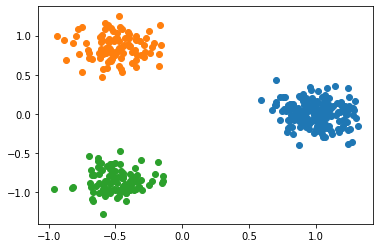

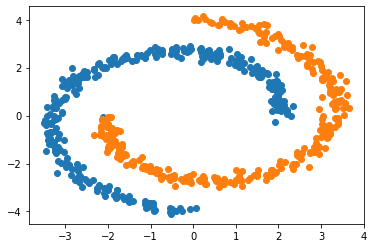

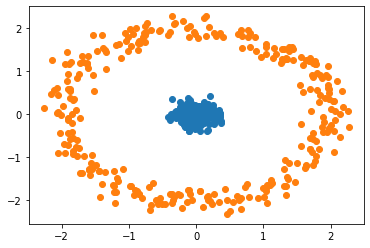

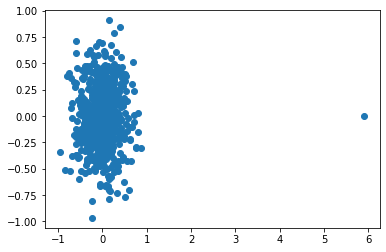

In [244]:
#file generate_data.py

"""
Code for generating data in R^2 for clustering algorithms.
"""

import numpy as np
import sklearn.datasets as skd


def worst_case_blob(num_samples, gen_pam):
    """
    Generates a single blob.

    :param num_samples: number of samples to create in the blob
    :param gen_pam:
    :return: X,  (num_samples, 2) matrix of 2-dimensional samples
             Y,  (num_samples, ) vector of "true" cluster assignment
    """
    blob_var = 0.3
    # X: matrix of shape (num_samples, 2)
    # Y: vector of shape (num_samples, )
    X, Y = skd.make_blobs(n_samples=num_samples, n_features=2, centers=np.column_stack((0, 0)), cluster_std=blob_var)
    X[-1] = [np.max(X) + gen_pam, 0] #ajoute à la dernière ligne, on met à la dernière ligne [le max, 0]
    return [X, Y]


def blobs(num_samples, n_blobs=3, blob_var=0.15, surplus=0): #gaussienne isotropique = distribution uniforme dans l'espace
    #num_samples c'est le nombre d'échantillons à créer dans le jeu de données
    #n_blobs = nombre de blop séparé (c'est le nombre de clustering)
    #variance gaussienne de chaque cluster
    #surplus = nombre d'échantillons suplémentaire ajouter au premier cluster pour créer une classe déséquilibré
    #si on met surplus =600 on va tout mettre dans un seul cluster
    """
    Creates N gaussian blobs evenly spaced across a circle.

    :param num_samples: number of samples to create in the dataset 
    :param n_blobs:      how many separate blobs to create
    :param blob_var:    gaussian variance of each blob
    :param surplus:     number of extra samples added to first blob to create unbalanced classes
    :return: X,  (num_samples, 2) matrix of 2-dimensional samples
             Y,  (num_samples, ) vector of "true" cluster assignment
    """
    x = np.arange(n_blobs) * 2 * np.pi / n_blobs  #np.arange va créer un vecteur de allant de 0 à 2 (n_blobs=3), pour créer nos 3 centres
    xf = x[0] #on met la première vaeur du vecteur dans xf
    x = x[1:] #on prend tout le vecteur sauf la première valuer
    centers = np.column_stack((np.cos(x), np.sin(x))) #va mettre dans la première colonne cos(x) et dans la deuxième sin(x)
    centerf = np.column_stack((np.cos(xf), np.sin(xf))) 
    Xf, Yf = skd.make_blobs(n_samples=int((num_samples - surplus) / n_blobs + surplus), n_features=2, centers=centerf,
                            cluster_std=blob_var) 
    #n_samples va donner le nombre d'échantillon présent dans le premier cluster, n_features son nb de caractéristique (par défaut à 2)
    #centers donne le centre du cluster, cluster_std c'est la variance du cluster (+ variance grande, plus les points du même cluster sont éloignés)
    
    
    X, Y = skd.make_blobs(n_samples=int((num_samples - surplus) / n_blobs), n_features=2, centers=centers,
                          cluster_std=blob_var)
    
    #Y va donner 599 cluster différents car on a donné centers un vecteur de taille 599, alors que centersf n'a qu'un cluster
    X = np.vstack((Xf, X)) #va mettre sur la première ligne le vecteur Xf, sur la deuxieme ligne le vecteur X (car on veut veut X soit sur 2 colonnes)
    Y = np.array(list(Yf) + list(Y + 1)) #quand on ajoute 2 liste ca va juste ajouter une liste après l'autre et on veut que Y nous renvoie un vecteur
    return [X, Y]


def two_moons(num_samples, moon_radius=2.0, moon_var=0.02):
    
    #va créer 2 lunes liés
    """
    Creates two intertwined moons

    :param num_samples: number of samples to create in the dataset
    :param moon_radius: radius of the moons
    :param moon_var:    variance of the moons
    :return: X,  (num_samples, 2) matrix of 2-dimensional samples
             Y,  (num_samples, ) vector of "true" cluster assignment
    """
    X = np.zeros((num_samples, 2))

    for i in range(int(num_samples / 2)):
        r = moon_radius + 4 * i / num_samples
        t = i * 3 / num_samples * np.pi
        X[i, 0] = r * np.cos(t)
        X[i, 1] = r * np.sin(t)
        X[i + int(num_samples / 2), 0] = r * np.cos(t + np.pi)
        X[i + int(num_samples / 2), 1] = r * np.sin(t + np.pi)

    X = X + np.sqrt(moon_var) * np.random.normal(size=(num_samples, 2))
    Y = np.ones(num_samples)
    Y[:int(num_samples / 2) + 1] = 0
    return [X, Y.astype(int)]


def point_and_circle(num_samples, radius=2.0, sigma=0.15):
    """
    Creates point and circle

    :param num_samples: number of samples to create in the dataset
    :param sigma:       variance
    :param radius:      radius of the circle
    :return: X,  (num_samples, 2) matrix of 2-dimensional samples
             Y,  (num_samples, ) vector of "true" cluster assignment [1:c]
    """
    # data array
    X = np.zeros((num_samples, 2))
    # array containing the indices of the true clusters
    Y = np.zeros(num_samples, dtype=np.int32)

    # generate data
    block_size = num_samples // 2
    for ii in range(1, 3):
        start_index = (ii - 1) * block_size
        end_index = ii * block_size
        if ii == 3:
            end_index = num_samples
        Y[start_index:end_index] = ii - 1
        nn = end_index - start_index
        if ii == 1:
            X[start_index:end_index, 0] = sigma*np.random.randn(nn)
            X[start_index:end_index, 1] = sigma*np.random.randn(nn)
        else:
            angle = 2*np.pi * np.random.uniform(size=nn) - np.pi
            X[start_index:end_index, 0] = radius*np.cos(angle) + sigma * np.random.randn(nn)
            X[start_index:end_index, 1] = radius*np.sin(angle) + sigma * np.random.randn(nn)
    return X, Y


# --------------------------------
# Visualizing the data
# --------------------------------

if __name__ == '__main__':
    

    blobs_data, blobs_clusters = blobs(600)
    moons_data, moons_clusters = two_moons(600)
    point_circle_data, point_circle_clusters = point_and_circle(600)
    worst_blobs_data, worst_blobs_clusters = worst_case_blob(600, 5.0)

    plot_clusters(blobs_data, blobs_clusters, 'blobs', show=False)
    plot_clusters(moons_data, moons_clusters, 'moons', show=False)
    plot_clusters(point_circle_data, point_circle_clusters, 'point and circle', show=False)
    plot_clusters(worst_blobs_data, worst_blobs_clusters, 'worst case blob', show=True)




//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


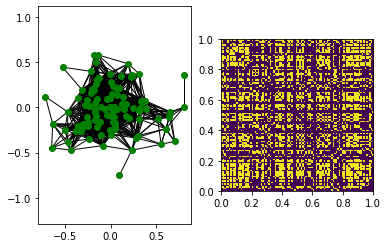

In [428]:
#file build_similarities_graph.py

"""
Functions to build and visualize similarity graphs, and to choose epsilon in epsilon-graphs.
"""

#BUILD SIMILARITY GRAPH

import numpy as np
import matplotlib.pyplot as pyplot
import scipy.spatial.distance as sd
import sys
import os





def build_similarity_graph(X, var=1.0, eps=0.0, k=0): #par défaut met var=1, eps=0, k=0
    """
    TO BE COMPLETED.

    Computes the similarity matrix for a given dataset of samples. If k=0, builds epsilon graph. Otherwise, builds
    kNN graph.

    :param X:    (n x m) matrix of m-dimensional samples
    :param var:  the sigma value for the exponential function, already squared
    :param eps:  threshold eps for epsilon graphs
    :param k:    the number of neighbours k for k-nn. If zero, use epsilon-graph
    :return:
        W: (n x n) dimensional matrix representing the adjacency matrix of the graph
    """
    n = X.shape[0]
    W = np.zeros((n, n))

    """
    Build similarity graph, before threshold or kNN
    similarities: (n x n) matrix with similarities between all possible couples of points.
    The similarity function is d(x,y)=exp(-||x-y||^2/(2*var))
    """
  
    similarities = np.zeros((n, n))  #on stock toutes les similarités
    for i in range(n):
        for j in range(n):
            similarities[i,j]= np.exp(-((np.linalg.norm(X[i,:]-X[j,:])**2)/2*var))
    
    
    for i in range(n):
        similarities[i,i]=0
    
    # If epsilon graph
    if k == 0 :
        for i in range(n): 
            for j in range(n):
                if similarities[i,j]>=eps:
                    W[i,j]=similarities[i,j]
        
        """
        compute an epsilon graph from the similarities             
        for each node x_i, an epsilon graph has weights             
        w_ij = d(x_i,x_j) when w_ij >= eps, and 0 otherwise          
        """
        

    # If kNN graph
    
   
                    
                
            
            
            
        
    if k != 0:
        for i in range(n):
            indices = np.argsort(similarities[i,:])  #argsort permet de retourner les indices dans l'odre croissant
            for j in range(k):
                W[i,indices[n-(j+1)]]=similarities[i,indices[n-(j+1)]]
        #maintenant on veut la rendre symétrique pour avoir une undirected donc on fait max(W,W transpose)
        #Ca veut dire qu'on rend le graph undirected
        for i in range(n):
            for j in range(n):
                if W[i,j]>W[j,i]:
                    W[j,i]=W[i,j]
                else :
                    W[i,j]=W[j,i]
        
        W=(W+np.transpose(W))/2        
        for i in range(n):
            W[i,i]=0 #on met les éléments diagonaux à 0        
                    
        
        """
        compute a k-nn graph from the similarities                   
        for each node x_i, a k-nn graph has weights                  
        w_ij = d(x_i,x_j) for the k closest nodes to x_i, and 0     
        for all the k-n remaining nodes                              
        Remember to remove self similarity and                       
        make the graph undirected                                    
        """
        pass

    return W


def plot_similarity_graph(X, Y, var=1.0, eps=0.0, k=5):
    """
    Function to plot the similarity graph, given data and parameters.

    :param X: (n x m) matrix of m-dimensional samples
    :param Y: (n, ) vector with cluster assignments
    :param var:  the sigma value for the exponential function, already squared
    :param eps:  threshold eps for epsilon graphs
    :param k:    the number of neighbours k for k-nn
    :return:
    """
    # use the build_similarity_graph function to build the graph W
    # W: (n x n) dimensional matrix representing the adjacency matrix of the graph
    W = build_similarity_graph(X, var, eps, k)

    # Use auxiliary function to plot
    plot_graph_matrix(X, Y, W)


def how_to_choose_epsilon():
    """
    TO BE COMPLETED.

    Consider the distance matrix with entries dist(x_i, x_j) (the euclidean distance between x_i and x_j)
    representing a fully connected graph.
    One way to choose the parameter epsilon to build a graph is to choose the maximum value of dist(x_i, x_j) where
    (i,j) is an edge that is present in the minimal spanning tree of the fully connected graph. Then, the threshold
    epsilon can be chosen as exp(-dist(x_i, x_j)**2.0/(2*sigma^2)).
    """
    # the number of samples to generate
    num_samples = 100

    # the option necessary for worst_case_blob, try different values
    gen_pam = 0.0  # to understand the meaning of the parameter, read worst_case_blob in generate_data.py

    # get blob data
    X, Y = worst_case_blob(num_samples, gen_pam)
    # X, Y = two_moons(num_samples)

    """
     use the distance function and the min_span_tree function to build the minimal spanning tree min_tree                   
     - var: the exponential_euclidean's sigma2 parameter          
     - dists: (n x n) matrix with euclidean distance between all possible couples of points                   
     - min_tree: (n x n) indicator matrix for the edges in the minimal spanning tree                           
    """
    var = 1.0
    dists = np.zeros((X.shape[0],X.shape[0]))  # dists[i, j] = euclidean distance between x_i and x_j
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if i == j :
                dists[i,j]=0
            else :
                dists[i,j]= np.linalg.norm(X[i,:]-X[j,:])
    
    
    
    
    min_tree = min_span_tree(dists)
    
    

    """
    set threshold epsilon to the max weight in min_tree 
    """
    valeurs=np.zeros(min_tree.shape[0]-1)
    l=0
    for i in range(min_tree.shape[0]):
        for j in range(min_tree.shape[0]):
            if min_tree[i,j]==True:
                valeurs[l]=dists[i,j]
                l+=1
    
    
    
    distance_threshold = valeurs.max()
    eps = np.exp(-distance_threshold**2.0/(2*var))
    
    
    """
    use the build_similarity_graph function to build the graph W  
     W: (n x n) dimensional matrix representing                    
        the adjacency matrix of the graph
       use plot_graph_matrix to plot the graph                    
    """
    W = build_similarity_graph(X, var=var, eps=eps, k=0)
    plot_graph_matrix(X, Y, W)
    #j'appelle ma fonction dans la main

if __name__ == '__main__':
    how_to_choose_epsilon()


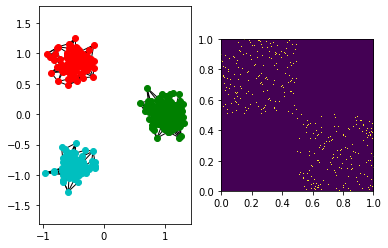

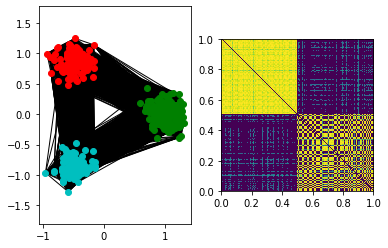

In [391]:
#here we are comparing for the same dataset the epsilon graph and the k-NN graph
X=blobs_data
Y=blobs_clusters
plot_similarity_graph(X, Y, var=1.0, eps=0.0, k=5)
plot_similarity_graph(X,Y,var=1.0, eps=0.3,k=0)

In [429]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as skm
import scipy



def build_laplacian(W, laplacian_normalization=""):
  
  
    """
    Compute graph Laplacian.
    :param W: adjacency matrix
    :param laplacian_normalization:  string selecting which version of the laplacian matrix to construct
                                     'unn':  unnormalized,
                                     'sym': symmetric normalization
                                     'rw':  random-walk normalization
    :return: L: (n x n) dimensional matrix representing the Laplacian of the graph
    """
    
    
    D=np.zeros(W.shape)
    
    
    for i in range(W.shape[0]):
        D[i,i]=np.sum(W[i,:])
      
    laplacian = D - W
    
    racine_D = np.sqrt(D)
    racine_D_inv = np.linalg.inv(racine_D)
    D_inv = np.linalg.inv(D)
    
    if laplacian_normalization=='sym':
        
        
        laplacian = np.dot( np.dot(racine_D_inv , laplacian) , racine_D_inv)
    
    if laplacian_normalization=='rw':
        
        laplacian = np.dot(D_inv , laplacian)       

        
    
    return laplacian


def spectral_clustering(L, chosen_eig_indices, num_classes=2):
    """
    :param L: Graph Laplacian (standard or normalized)
    :param chosen_eig_indices: indices of eigenvectors to use for clustering
    :param num_classes: number of clusters to compute (defaults to 2)
    :return: Y: Cluster assignments
    """

    """
    Use the function scipy.linalg.eig or the function scipy.sparse.linalg.eigs to compute:
    U = (n x n) eigenvector matrix           (sorted)
    E = (n x n) eigenvalue diagonal matrix   (sorted)
    """
    
    vap , vep = np.linalg.eig(L)
    
    indice=np.argsort(vap)
    
    E = np.zeros((vep.shape[0] , vep.shape[0]))
     
    for i in range(vep.shape[0]):
        E[:,i]=vep[:, indice[i]]
        
        
    U = np.zeros((vep.shape[0] , vep.shape[0]))
    for i in range(vep.shape[0]):
        U[i,i]=indice[i]
   
    
    M = np.zeros((E.shape[0] ,len(chosen_eig_indices)))
    for i in range(len(chosen_eig_indices)):
        M[:,i]=E[:, int(chosen_eig_indices[i])]
        
        

    """
    compute the clustering assignment from the eigenvectors        
    Y = (n x 1) cluster assignments [0,1,...,c-1]                   
    
    """
    kmeans = KMeans(num_classes).fit(M)        
    Y = kmeans.labels_
    
    return Y


def two_blobs_clustering():
    """
    TO BE COMPLETED
    Clustering of two blobs. Used in questions 2.1 and 2.2
    """

    # Get data and compute number of classes
    X, Y = blobs(600, n_blobs=2, blob_var=0.15, surplus=0)
    num_classes = len(np.unique(Y))

    """
    Choose parameters
    """
    k = 0
    var = 1.0  # exponential_euclidean's sigma^2

    laplacian_normalization = 'unn'
    
    chosen_eig_indices = [ 1 ]    # indices of the ordered eigenvalues to pick

    # build laplacian
    W = build_similarity_graph(X, var=var,eps=0.3, k=k)
    L = build_laplacian(W, laplacian_normalization)
    
    
    

    # run spectral clustering
    Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes=num_classes)
    print(Y_rec)

    # Plot results
    plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))

    
    
    
    

    
    
    
    
    
    
def choose_eigenvalues(eigenvalues):
    """
    Function to choose the indices of which eigenvalues to use for clustering.
    :param eigenvalues: sorted eigenvalues (in ascending order)
    :return: indices of the eigenvalues to use
    """
    
    
    difference = np.zeros(len(eigenvalues)-1)
    
    for i in range(len(eigenvalues)-1):
        difference[i] = eigenvalues[i+1]-eigenvalues[i]
    
    

    V = 0
    
    for i in range(len(difference)):
        if difference[i]>V:
            V = difference[i]
    
    
    for i in range(len(difference)):
        if difference[i] == V:
            V = i+1
    
            
    eig_ind = np.zeros(int(V))
    
    for i in range(int(V)):
        eig_ind[i]=i  
        
    
    return(eig_ind)


def spectral_clustering_adaptive(L, num_classes=2):
    """
    Spectral clustering that adaptively chooses which eigenvalues to use.
    :param L: Graph Laplacian (standard or normalized)
    :param num_classes: number of clusters to compute (defaults to 2)
    :return: Y: Cluster assignments
    """

    """
    Use the function scipy.linalg.eig or the function scipy.linalg.eigs to compute:
    U = (n x n) eigenvector matrix           (sorted)
    E = (n x n) eigenvalue diagonal matrix   (sorted)
    """
    
    vap , vep = np.linalg.eig(L)
    
    indices = np.argsort(vap)
    
    E = np.zeros((vep.shape[0] , vep.shape[0]))
     
    for i in range(vep.shape[0]):
        E[:,i]=vep[:, indices[i]]
        
        
    U = np.zeros((vep.shape[0] , vep.shape[0]))
    
    for i in range(vep.shape[0]):
        U[i,i]=vap[indices[i]]
   
    
    vap_2 = np.zeros(len(vap))
    for i in range(len(indices)):
        vap_2[i] = vap[indices[i]]
        
    eig_ind = choose_eigenvalues(vap_2)      ## vap_2 vap classées
    
    M = np.zeros((E.shape[0] ,len(eig_ind)))
    for i in range(len(eig_ind)):
        M[:,i]=E[: , int(eig_ind[i])]
        
    """
    compute the clustering assignment from the eigenvectors   
    Y = (n x 1) cluster assignments [1,2,...,c]                   
    """
    
    kmeans = KMeans(num_classes).fit(M)        
    Y = kmeans.labels_
    
    return Y




def find_the_bend(var):
    """
    TO BE COMPLETED
    Used in question 2.3
    :return:
    """

    # the number of samples to generate
    num_samples = 600

    # Generate blobs and compute number of clusters
    X, Y = blobs(num_samples, 4, 0.03)
    num_classes = len(np.unique(Y))

    
    """
    Choose parameters
    """
    
    k = 90
     # exponential_euclidean's sigma^2
    laplacian_normalization = ''  # either 'unn'normalized, 'sym'metric normalization or 'rw' random-walk normalization


    
    
    
    # build laplacian
    W = build_similarity_graph(X, var=var, eps=0.95, k=k)
    L = build_laplacian(W, laplacian_normalization)

    
    """
    compute first 15 eigenvalues and call choose_eigenvalues() to choose which ones to use. 
    """
    
    
    
    eigenvalues = np.zeros(15)
    
    vap , vep = np.linalg.eig(L)
    
    indices=np.argsort(vap)
    
    for i in range(15):
        eigenvalues[i] = vap[indices[i]]
        
    chosen_eig_indices = choose_eigenvalues(eigenvalues)  # indices of the ordered eigenvalues to pick
    
    print(chosen_eig_indices)
    print(eigenvalues)
    
    


    """
    compute spectral clustering solution using a non-adaptive method first, and an adaptive one after (see handout) 
    Y_rec = (n x 1) cluster assignments [0,1,..., c-1]    
    """
    
    
    # run spectral clustering
    Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes=num_classes)
    
    Y_rec_adaptive = spectral_clustering_adaptive(L, num_classes=num_classes)

    plot_the_bend(X, Y, L, Y_rec, eigenvalues)


def two_moons_clustering():
    """
    TO BE COMPLETED.
    Used in question 2.7
    """
    # Generate data and compute number of clusters
    X, Y = two_moons(600)
    num_classes = len(np.unique(Y))

    """
    Choose parameters
    """
    k = 15
    var = 1.0  # exponential_euclidean's sigma^2

    laplacian_normalization = 'unn'
    chosen_eig_indices = [ 1 ]    # indices of the ordered eigenvalues to pick


    # build laplacian
    W = build_similarity_graph(X, var=var, eps=0.3, k=k)
    L = build_laplacian(W, laplacian_normalization)
    Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes=num_classes)

    plot_clustering_result(X, Y, L, Y_rec, KMeans(num_classes).fit_predict(X))


def point_and_circle_clustering():
    """
    TO BE COMPLETED.
    Used in question 2.8
    """
    # Generate data and compute number of clusters
    X, Y = point_and_circle(600)
    num_classes = len(np.unique(Y))

    """
    Choose parameters
    """
    k = 0
    var = 1.0  # exponential_euclidean's sigma^2

    
    

    

    # build laplacian
    W = build_similarity_graph(X, var=var, eps= .52,  k=k)
    L_unn = build_laplacian(W, 'unn')
    
    L_norm = build_laplacian(W, 'rw')
    
    
    
    chosen_eig_indices = [1, 2, 3]    # indices of the ordered eigenvalues to pick
    
    
    
    Y_unn = spectral_clustering(L_unn, chosen_eig_indices, num_classes=num_classes)
    Y_norm = spectral_clustering(L_norm, chosen_eig_indices, num_classes=num_classes)

    plot_clustering_result(X, Y, L_unn, Y_unn, Y_norm, 1)


def parameter_sensitivity():
    """
    TO BE COMPLETED.
    A function to test spectral clustering sensitivity to parameter choice.
    Used in question 2.9
    """
    # the number of samples to generate
    num_samples = 500

    """
    Choose parameters
    """
    var = 1.0  # exponential_euclidean's sigma^2
    laplacian_normalization = 'unn'
    chosen_eig_indices = [1, 2]

    """
    Choose candidate parameters
    """
    
    parameter_candidate = np.arange (15) + 1 # the number of neighbours for the graph or the epsilon threshold
    parameter_performance = []

    for k in parameter_candidate:
        # Generate data
        X, Y = two_moons(num_samples, 1, 0.02)
        num_classes = len(np.unique(Y))

        W = build_similarity_graph(X, k=k)
        
        L = build_laplacian(W, laplacian_normalization)
        
        
       
    

        Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes)

        parameter_performance += [skm.adjusted_rand_score(Y, Y_rec)]

    plt.figure()
    plt.plot(parameter_candidate, parameter_performance)
    plt.title('parameter sensitivity')
    plt.show()
    


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


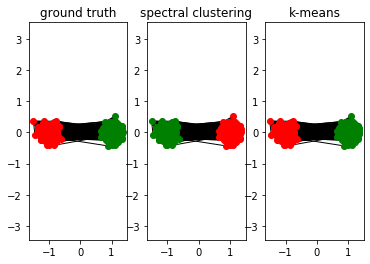

In [305]:
two_blobs_clustering()

[0. 1. 2.]
[1.18569873e-13 1.85448417e+01 3.35958251e+01 5.80929444e+01
 7.95691634e+01 8.37111835e+01 8.60722682e+01 8.69515408e+01
 8.76673530e+01 8.79231645e+01 8.84438457e+01 8.86273977e+01
 8.88065792e+01 8.90900717e+01 8.91179934e+01]


//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


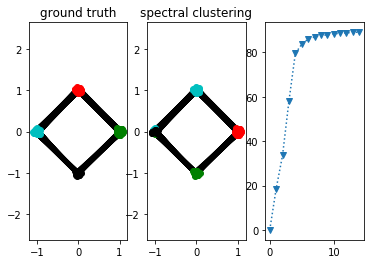

[0. 1. 2. 3.]
[-1.52766688e-13  9.30246967e+00  1.66274601e+01  3.04965953e+01
  6.30806018e+01  6.35269924e+01  6.38072916e+01  6.45096284e+01
  6.46314444e+01  6.48465552e+01  6.48736370e+01  6.49241030e+01
  6.50471030e+01  6.51151554e+01  6.51621484e+01]


//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


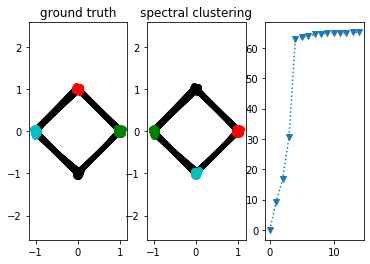

In [304]:
find_the_bend(0.03)  # We use the classical clustering
find_the_bend(.2)

[0. 1. 2. 3.]
[-3.51930498e-14  1.74560313e+01  3.07029007e+01  5.29715151e+01
  7.67786983e+01  7.97483487e+01  8.10309654e+01  8.19973307e+01
  8.21701013e+01  8.24430137e+01  8.26667689e+01  8.28742432e+01
  8.30701630e+01  8.32399610e+01  8.32705030e+01]


//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


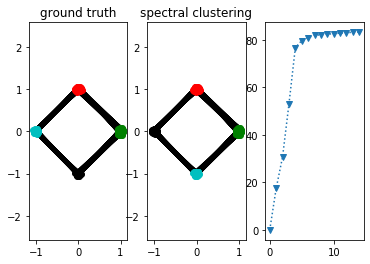

In [390]:
find_the_bend(0.2)  # we use the adaptive clustering. So we see that the adaptive clustering returns the same thing that the classical one

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


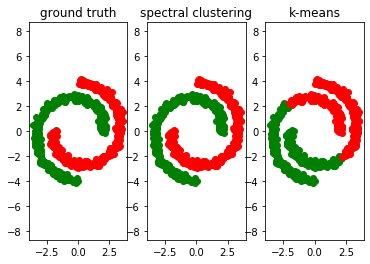

In [308]:
two_moons_clustering()

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


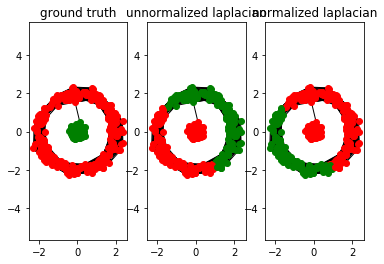

In [430]:
point_and_circle_clustering()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: ComplexWarning: Casting complex values to real discards the imaginary part


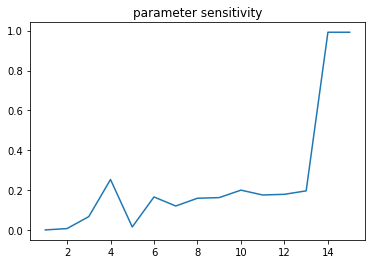

In [423]:
parameter_sensitivity()

2.1-
    If the graph is connected we choose the second, third and fourth eigenvectors because it corresponds to the smallest eigenvalues different from 0. Indeed by taking the smallest eigenvalues we minimize the cost of cutting the graph according to the course. The spectral clustering is the same for a connected graph as the k-means clustering.
        
2.2-
    Similarly we choose the eigenvectors linked to the smallest eigenvalues because it minimize the cost of cutting the graph. This time we don't care that the eigenvalue is zero or not because the eigenvector associated is 1 for each node belonging to a connected components and 0 otherwise. So each eigenvector describe wich point belongs to wich  connected components.

2.3-
    for the function choose_eigenvalues will code the elbow rule by looking at the difference between the eigenvalues, and then we will look at the maximum of those differences. We will return the indices of the eigenvalues before that maximum gap.  
        
2.4- 
    Increasing the variance from .03 to .2 does not seem to change a lot the eigenvalues. The gap is less "visible"
        
2.5-
    We use k-means during our algorithm. When we want two clusters it is not important using k-means or tresholding , but when we want more than two clusters we can't use tresholding so we'll use k-means.

2.6-
    Looking at the eigenvalues helps us to choose the eigenvectors to cluster. Moreover it helps us to know how many components are connected indeed there are as many aigenvalues equal to zero as connected components. It helps us to know how many cluster will have.
        
2.7-
    We notice that spectral clustering is more efficient than k-means methods. K-means cluster the data linearly, unlike spectral clustering, so the algorithme will look at an hyperplane that will separate the data in two clusters. But in our case that is not what we want because the datas are not linearly separable. Spectral clustering is more efficient because it will separate the data thanks to the eigenvalues and the eigenvectors that are directly linked to the structure of the graph.
      
2.8- 
    There is no difference between the normalized and the unormalized laplacian because the structure of the graph is unchanged.
2.9-
    The ARI shows us that the stability of spectral clustering depends a lot of our parameters. we can see that when k is small the clustering is not very efficient. Then the ARI reached a tray where it is absolutly efficient that means that the clustering returns the true labels. It's quiete normal because if there is not enough edges the cut will not happen between two separate blocks of datas but within the blocks.
        
2.10-
    It's very difficult to check our results when we don't have the true labels. We can not use the results of a 
k-means indeed we have seen in 2.7 that if the datas are not linearly separable it won't return the good clustering.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: ComplexWarning: Casting complex values to real discards the imaginary part


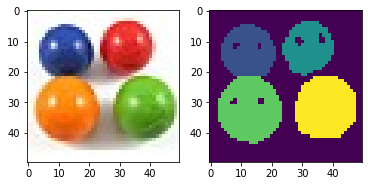

In [413]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import os


def image_segmentation(input_img='four_elements.bmp'):
    """
    TO BE COMPLETED
    Function to perform image segmentation.
    :param input_img: name of the image file in /data (e.g. 'four_elements.bmp')
    """

    X = io.imread('four_elements.bmp')
    X = (X - np.min(X)) / (np.max(X) - np.min(X))

    im_side = np.size(X, 1)
    Xr = X.reshape(im_side ** 2, 3)
    
    """
    Y_rec should contain an index from 0 to c-1 where c is the     
     number of segments you want to split the image into          
    """

    
    
    """
    Choose parameters
    """
    
    var = 1.0
    k = 0
    laplacian_normalization = 'unn'
    chosen_eig_indices = [1,2,3,4]
    num_classes = 5
    
    
    ### we use epsilon tresholding to find the best epsilon
    dists = np.zeros((Xr.shape[0],Xr.shape[0]))  # dists[i, j] = euclidean distance between x_i and x_j
    for i in range(Xr.shape[0]):
        for j in range(Xr.shape[0]):
            if i == j :
                dists[i,j]=0
            else :
                dists[i,j]= np.linalg.norm(Xr[i,:]-Xr[j,:])
    
    
    min_tree = min_span_tree(dists)
   
    valeurs=np.zeros(min_tree.shape[0]-1)
    l=0
    for i in range(min_tree.shape[0]):
        for j in range(min_tree.shape[0]):
            if min_tree[i,j]==True:
                valeurs[l]=dists[i,j]
                l+=1
    
    
    
    distance_threshold = valeurs.max()
    eps = np.exp(-distance_threshold**2.0/(2*var))
    

    W = build_similarity_graph(Xr, var=var,eps = eps, k=k)
    L = build_laplacian(W, laplacian_normalization)
    Y_rec = spectral_clustering(L, chosen_eig_indices, num_classes=num_classes)

    plt.figure()

    plt.subplot(1, 2, 1)
    plt.imshow(X)

    plt.subplot(1, 2, 2)
    Y_rec = Y_rec.reshape(im_side, im_side)
    plt.imshow(Y_rec)

    plt.show()


image_segmentation()

3.2-
    We can also try to remove the zeros of the matrix and store the matrix in an other form, for example we can imagine to use an adjacency list instead of an adjacency matrix ( usually those methods use the form of the matrix). Indeed if the graph is very large we can imagine that a lot of nodes won't be connected and that we will have a sparse matrix.  
    We can use eigs for sparse matrix and it will return only a subset of eigenpairs. 
    
3.3-
    eig and eigs will solve an ordinary or generalized eigenvalue problem of a square matrix but we can specify the number of eigenpairs we want with eigs. Eig gives us all the eigenpairs of the matrix. Eig is adapted when the matrix fits well in memory ( does not work with sparse matrix). Eigs is more adapted for large graphs or when the matrix is stored in sparse format because it would take too much memory to store in its full format.